# QCTO - Workplace Module

### Project Title: Simulated Factor-Based ETF
#### Done By: Sanele Bhembe

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

### **Introduction**
Exchange-Traded Funds (ETFs) are investment funds that track a basket of assets such as stocks, bonds, or commodities. They allow investors to gain diversified exposure to a market or sector without purchasing individual stocks. ETFs are often passively managed, following an index or specific criteria, but some may be actively rebalanced. 

In this project, the goal is to simulate a factor-based ETF using historical stock data from the Johannesburg Stock Exchange market. By selecting well-performing stocks based on historical performance metrics, a model ETF will be constructed to track their collective performance. Additionally, different portfolio rebalancing strategies will be explored to optimize returns and manage risk.

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

There are two main datasets used in this project, the histocical data of individual stocks listed in the JSE market and the JSE Top 40 index historic data. The individual stocks data was sourced from kaggle (link to dataset - https://www.kaggle.com/datasets/eren2222/south-africa-daily-historical-stock-1998-2024) and the jSE Top 40 dataset was collected from investing.com, a website with historic stock data for local and global markets. The individual stocks dataset contains 6 columns namely:
* `'Date'`: This column contains the date for each recorded stock price (daily)

* `'Ticker'`: This column contains the stock symbols of the companies

* `'Company_Name'`: This column contains the name of the companies

* `'Open'`: This column contains the open price of each day

* `'High'`: This column contains the high price of each day

* `'Low'`: This column contains the low price of each day

* `'Close'`: This column contains the close price of each day

* `'Adj Close'`: This column contains the adjusted close price of each day

* `'Volume'`: This column contains the total volume of shares traded in each day

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [5]:
#Loading the historical individual stock data
df = pd.read_csv('Data/SA_Stock_Market.csv', index_col=0)

#Loading the benchmark data JSE Top 40 (J200)
j200 = pd.read_csv('Data/South Africa Top 40 Historical Data.csv')

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [7]:
# Historical stock data (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891980 entries, 0 to 891979
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          891980 non-null  object 
 1   Ticker        891980 non-null  object 
 2   Company_Name  891980 non-null  object 
 3   Open          891961 non-null  float64
 4   High          891961 non-null  float64
 5   Low           891961 non-null  float64
 6   Close         891961 non-null  float64
 7   Adj Close     891961 non-null  float64
 8   Volume        891961 non-null  float64
dtypes: float64(6), object(3)
memory usage: 68.1+ MB


In [9]:
# Checking null values
df.isnull().sum()

Date             0
Ticker           0
Company_Name     0
Open            19
High            19
Low             19
Close           19
Adj Close       19
Volume          19
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

In [15]:
# J200 data
j200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4998 non-null   object
 1   Price     4998 non-null   object
 2   Open      4998 non-null   object
 3   High      4998 non-null   object
 4   Low       4998 non-null   object
 5   Vol.      4929 non-null   object
 6   Change %  4998 non-null   object
dtypes: object(7)
memory usage: 273.5+ KB


In [17]:
j200.dropna(inplace=True)

In [19]:
j200['Date'] = pd.to_datetime(j200['Date'])
j200['Price'] = j200['Price'].str.replace(',', '')
j200['Open'] = j200['Open'].str.replace(',', '')
j200['High'] = j200['High'].str.replace(',', '')
j200['Low'] = j200['Low'].str.replace(',', '')
j200['Vol.'] = j200['Vol.'].str.replace('M', '')
j200.loc[j200["Vol."].str.contains("K", na=False), "Vol_K"] = j200["Vol."]
j200['Vol.'] = j200['Vol.'].str.replace('K', '')
j200['Vol_K'] = j200['Vol_K'].str.replace('K', '')
j200['Change %'] = j200['Change %'].str.replace('%', '')


j200['Price'] = j200['Price'].astype('float32')
j200['Open'] = j200['Open'].astype('float32')
j200['High'] = j200['High'].astype('float32')
j200['Low'] = j200['Low'].astype('float32')
j200['Vol.'] = j200['Vol.'].astype('float32')
j200['Change %'] = j200['Change %'].astype('float32')
j200['Vol_K'] = j200['Vol_K'].astype('float32')
j200['Vol.'] = j200['Vol.'] * 1000000
j200['Vol_K'] = j200['Vol_K'] * 1000
j200.loc[~j200['Vol_K'].isna(), 'Vol.'] = j200['Vol_K']
j200.drop(columns={'Vol_K'}, axis=1, inplace=True)

j200.sort_values(by='Date', inplace=True)

In [21]:
j200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4929 entries, 4997 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4929 non-null   datetime64[ns]
 1   Price     4929 non-null   float32       
 2   Open      4929 non-null   float32       
 3   High      4929 non-null   float32       
 4   Low       4929 non-null   float32       
 5   Vol.      4929 non-null   float64       
 6   Change %  4929 non-null   float32       
dtypes: datetime64[ns](1), float32(5), float64(1)
memory usage: 211.8 KB


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [23]:
# How many unique stocks we have in the df data
print(f'Stocks in the data: {len(df['Ticker'].unique())}')

Stocks in the data: 193


In [25]:
# Date range
print(f'Earliest Date: {df['Date'].min()}')
print(f'Latest Date: {df['Date'].max()}')

Earliest Date: 1998-12-30 00:00:00
Latest Date: 2024-05-22 00:00:00


In [27]:
# Count of stock per year over the years
stocks_per_year = df[['Date', 'Ticker']].copy()
stocks_per_year['Date'] = stocks_per_year['Date'].dt.year
stocks_per_year = stocks_per_year.groupby('Date')['Ticker'].nunique().reset_index(name='Ticker_Count')


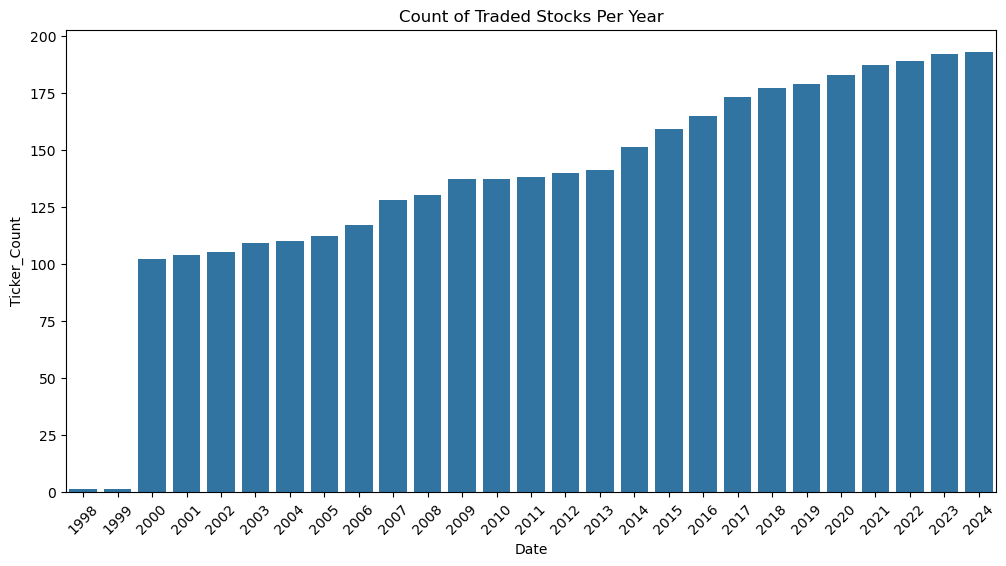

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=stocks_per_year['Date'], y=stocks_per_year['Ticker_Count'])
plt.title('Count of Traded Stocks Per Year')
plt.xticks(rotation=45)
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
